In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [14]:
df = pd.read_csv(r"E:\archive\hotel_bookings.csv")

In [15]:
# Basic info
print(df.shape)
print(df.info())

# Handle missing values
df.isnull().sum()

# Fill missing 'children' with 0
df['children'].fillna(0, inplace=True)

# Drop rows with missing 'agent' or 'company' for simplicity
df.drop(['agent', 'company'], axis=1, inplace=True)

# Convert categorical features
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

(119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  mea

C:\Users\anony\AppData\Local\Temp\ipykernel_1396\3345150302.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)


is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64


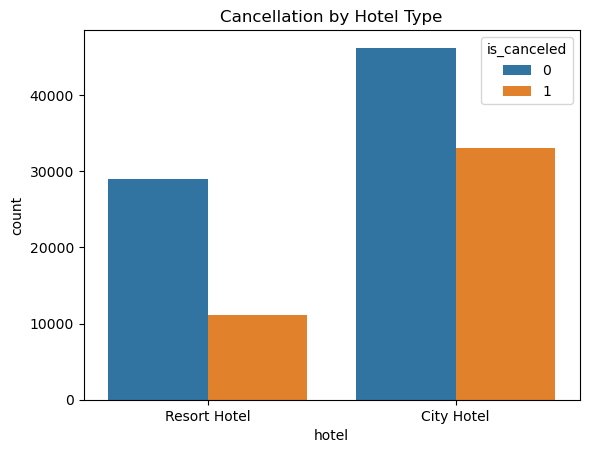

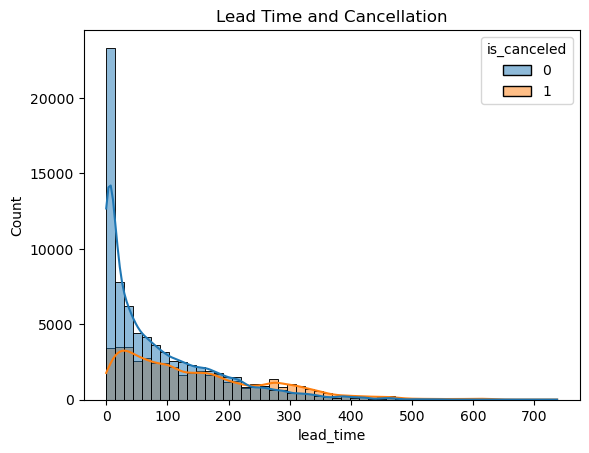

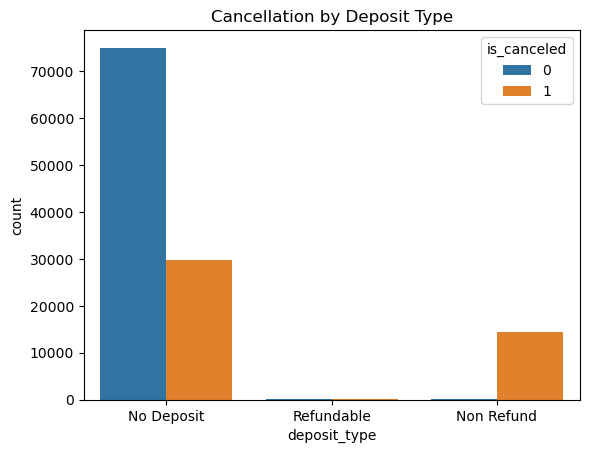

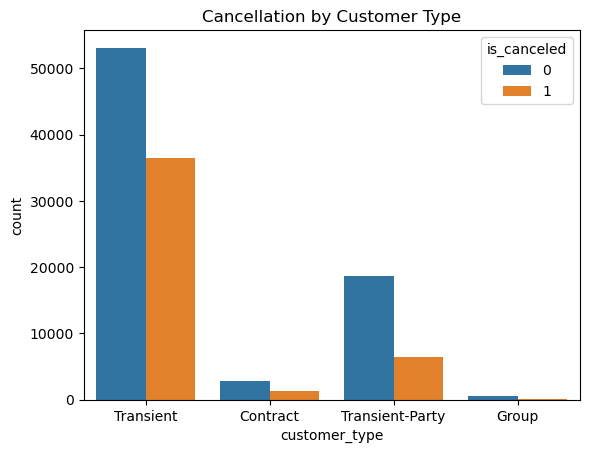

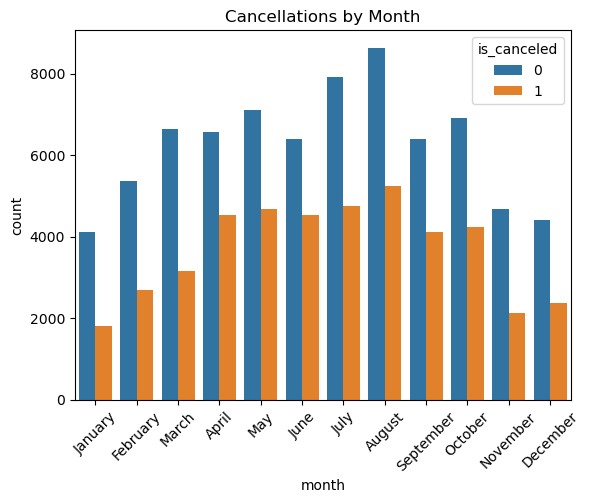

In [16]:
# Overall cancellation rate
cancel_rate = df['is_canceled'].value_counts(normalize=True) * 100
print(cancel_rate)

# Cancellation rate by hotel type
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Cancellation by Hotel Type')
plt.show()

# Lead time distribution
sns.histplot(data=df, x='lead_time', hue='is_canceled', bins=50, kde=True)
plt.title('Lead Time and Cancellation')
plt.show()

# Impact of deposit type
sns.countplot(x='deposit_type', hue='is_canceled', data=df)
plt.title('Cancellation by Deposit Type')
plt.show()

# Cancellation by customer type
sns.countplot(x='customer_type', hue='is_canceled', data=df)
plt.title('Cancellation by Customer Type')
plt.show()

# Monthly cancellation trends
df['month'] = df['arrival_date_month']
sns.countplot(x='month', hue='is_canceled', data=df,
              order=['January','February','March','April','May','June',
                     'July','August','September','October','November','December'])
plt.xticks(rotation=45)
plt.title('Cancellations by Month')
plt.show()

In [17]:


# Select features and target
features = ['lead_time', 'previous_cancellations', 'booking_changes',
            'adr', 'total_of_special_requests']
X = df[features]
y = df['is_canceled']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85     22478
           1       0.76      0.68      0.72     13339

    accuracy                           0.80     35817
   macro avg       0.79      0.78      0.78     35817
weighted avg       0.80      0.80      0.80     35817

